In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
T= np.linspace(50,5e4,10000)

def Urad(T):
    
    U= np.zeros_like(T)
    
    index=np.argwhere(
          ((T>3e3) & (T<=1e4))
    )
    U[index]= 4*np.pi*(100 + (1e9-100)*(T[index]-3e3)/(1e4-3e3))
    
    index=np.argwhere(
          ((T>1e4) & (T<3e4))
    )
    U[index] = 4*np.pi*(1e9 + (1e11-1e9)*(T[index]-1e4)/(3e4-1e4))
    
    index=np.argwhere(T>3e4) 
    U[index]=4*np.pi*1e11
    
    return U


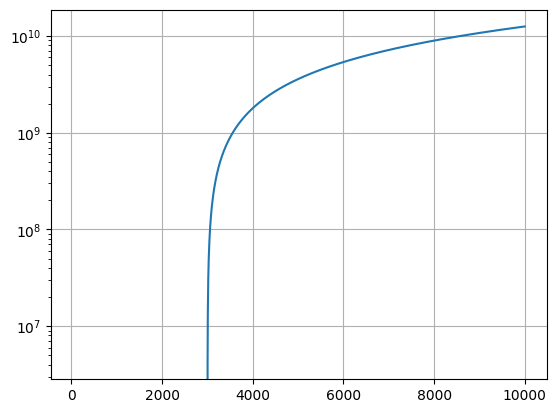

In [3]:
urad=Urad(T)

plt.plot(T[T<1e4],urad[T<1e4])
plt.yscale("log")
plt.grid()

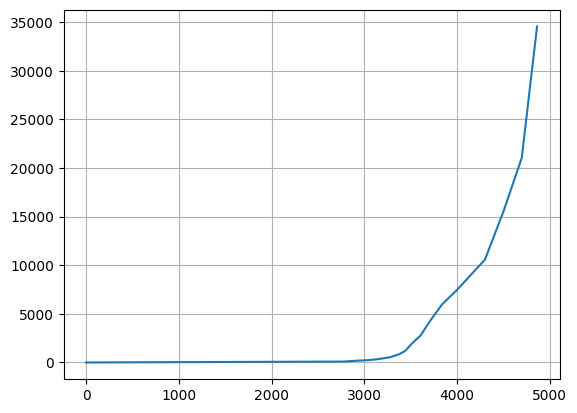

In [4]:
T_table,nec_table= np.loadtxt("nec2.txt",unpack=True)
plt.plot(T_table[T_table<5e3],nec_table[T_table<5e3])
plt.grid()

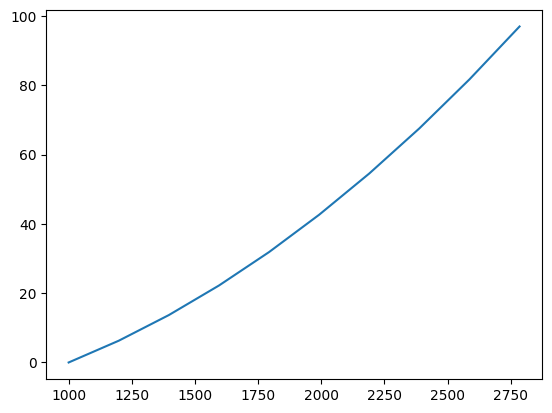

In [6]:
def fitNec(T):
    #get constraint for fitting  nec with y=bx^2 + cx +d
    #from T0=1000K to T1=2,78e3K
    dNecdT_1=np.gradient(nec_table[1:],T_table[1:],edge_order=2)[0] #nec gradient ad T1
    nec_1=nec_table[1] #nec value at T1
    nec_0=0
    
    #define coef matrix
    T1=T_table[1]
    T0=1e3
    A=np.array([[T1**2,T1,1],
                [2*T1,T1,0],
                [T0**2,T0,1]])
    B=np.array([nec_1,dNecdT_1,nec_0])
    (b,c,d)=np.linalg.solve(A,b=B)
    
    return b*T**2 + c*T + d

T=np.linspace(1000,T_table[1],10)
y=fitNec(T)
plt.plot(T,y)


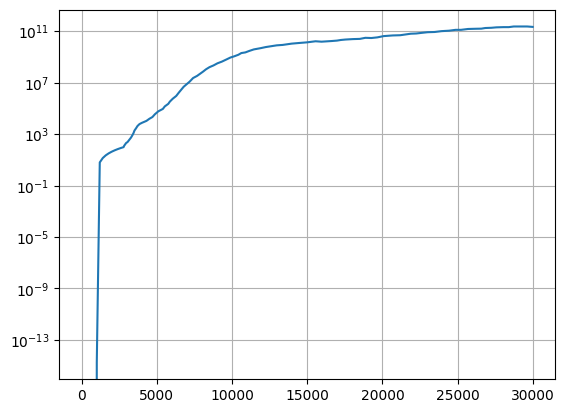

In [7]:
# save original data points and prepend interpolated data point
# from 0 to 1000 K we assume that the NEC is identically 0
# from 1000K to the first dataPoint we fit a quadratic function
T_interp=np.linspace(1e3,T_table[1],10)
T_final=np.concatenate((0,T_interp,T_table[1:]),axis=None)
nec_final=np.concatenate((0,fitNec(T_interp),nec_table[1:]), axis=None)
data_final=np.vstack((T_final,nec_final)).T
#print(data_final)
filename="nec_final.txt"

plt.semilogy(T_final,nec_final)
plt.grid()

In [8]:
np.savetxt(filename,data_final, header="T nec")